In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import redditutils


from string import punctuation
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
%load_ext autoreload
%autoreload 2

Suppress Pandas' automatic conversion of utc column to scientific notation:

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df = pd.read_csv('showerthoughts.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
author          1000000 non-null object
title           1000000 non-null object
subreddit       1000000 non-null object
score           1000000 non-null int64
num_comments    1000000 non-null int64
retrieved_on    1000000 non-null int64
id              1000000 non-null object
created_utc     1000000 non-null int64
selftext        591622 non-null object
dtypes: int64(4), object(5)
memory usage: 68.7+ MB


In [5]:
df.head()

,author,title,subreddit,score,num_comments,retrieved_on,id,created_utc,selftext
0,os_coxae,"Everyone that's ever said ""I'm speechless"" is ...",Showerthoughts,0,0,1466445837,4ixl2n,1463006328,NaN
1,Calrizle,I wonder how many people I've talked to who ha...,Showerthoughts,0,0,1466494743,4lfjxn,1464437036,NaN
2,[deleted],"""Palindrome"" is a let down as a word. Rhinopla...",Showerthoughts,0,0,1466493929,4ldt85,1464398463,[deleted]
3,[deleted],"When you tell someone to keep a secret, it is ...",Showerthoughts,0,0,1466423373,4hmcbg,1462264235,[deleted]
4,[deleted],"Someone had the the time to create the words, ...",Showerthoughts,0,0,1466474842,4k9ngz,1463768968,[deleted]


In [4]:
len(df[df.score > 1]) / len(df)

0.392702

39% of submissions get more than one upvote. This makes "greater than one upvote" a good candidate for our criteria for a good post.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
author          1000000 non-null object
title           1000000 non-null object
subreddit       1000000 non-null object
score           1000000 non-null int64
num_comments    1000000 non-null int64
retrieved_on    1000000 non-null int64
id              1000000 non-null object
created_utc     1000000 non-null int64
selftext        591622 non-null object
dtypes: int64(4), object(5)
memory usage: 68.7+ MB


In [7]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [7]:
pd.set_option('display.max_colwidth', 999)

In [8]:
df[df.score > 15000].sort_values(by='score', ascending=False)[['title', 'score']]

,title,score
991644,"College students don't want to go to graduation ceremonies, but they go to please their relatives, while relatives don't want to go but go to support the students; we should all just be honest and skip that ceremony and go out for pizza.",119052
962154,"The sentence ""Don't objectify women"" has ""women"" as the object of the sentence.",117934
998335,Being 35 and not wanting to work in the field for which you've prepared is like being half way through an RPG and realizing you've built out your skill tree all wrong and you can't respec and you can't make a new character and there will never be another video game again,117154
995932,"A guy named ""Weird Al"" has had a 40+ year long career with no allegations of sexual impropriety.",115008
999607,"The olympics is the only time when you hear ""Great execution by North Korea"" and it seems okay.",113782
988823,"This ""Spring Forward"" thing would be a lot more popular if we moved the clocks ahead at 2PM on Monday.",109257
999627,"If we rebranded ""Sunburns"" as ""Radiation burns"" people would take the dangers more seriously.",103607
997418,If you place a humidifier and a dehumidifier in the same room you can wirelessly transmit water,98755
998236,"Tinder is the opposite of porn site advertisements. There actually are a ton of hot singles in my area, but none of them are interested in me.",97392
999745,"I'm not a millennial, but if I was I'd be damn tired of another article every other day with a new theory about who millennials are and what they want.",95105


In [9]:
df_short = df.iloc[:1000, :]

## Visualizations

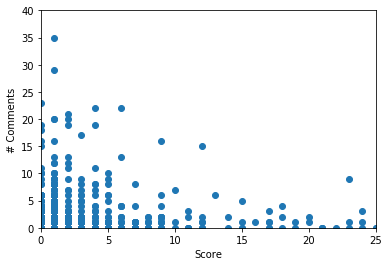

In [10]:
plt.scatter(df.score.sample(1000), df.num_comments.sample(1000))
plt.xlabel('Score')
plt.ylabel('# Comments')
plt.xlim([0, 25])
plt.ylim([0, 40]);

Poisson distribution when logged?

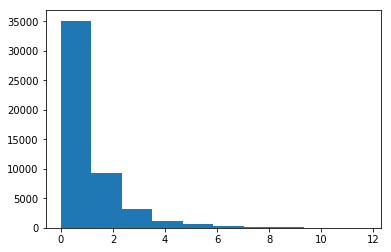

In [11]:
plt.hist(np.log1p(df.score.sample(50000)));

## Clean the data

In [12]:
df_nlp = df.copy()

### Tokenize by word

In [13]:
def strip_punc(s):
    return ''.join(c for c in s if c not in punctuation)

In [14]:
df_nlp['title'] = df_nlp['title'].apply(lambda x: word_tokenize(x))

KeyboardInterrupt: 

In [ ]:
df_nlp['title'] = df_nlp['title'].apply(lambda x: list(map(redditutils.lower_string, x)))

In [ ]:
df_nlp['title'] = df_nlp['title'].apply(lambda x: list(map(strip_punc, x)))

In [ ]:
df_backup = df_nlp.copy()

In [ ]:
df_nlp['title'] = df_nlp['title'].apply(lambda x: list(map(redditutils.strip_nums, x)))

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def strip_stops(s):
    if s in stop_words:
        return ''
    else:
        return s

In [ ]:
df_nlp['title'] = df_nlp['title'].apply(lambda x: list(map(strip_stops, x)))

In [29]:
df_nlp.to_csv('tokenized.csv')

In [15]:
df_nlp = pd.read_csv('tokenized.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df['title'] = df['title'].apply(lambda x: redditutils.strip_nums(x))

## Word count vectorization

In [14]:
cv = CountVectorizer(stop_words = 'english', min_df = 2, max_df = .95, strip_accents = 'unicode',
                     encoding = 'ISO-8859-1')

In [15]:
X = cv.fit_transform(df['title'])

In [16]:
cv_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())

In [17]:
cv_df.head()

,1닷,1닷com,1닷콤,1점,1점coм,1쫌컴,4ᆞcom,TM,__,___,...,毕业证代办,毕业证办理,永久存档,留信网认证,留学回国人员证明,績單,荜业證,落户购买免税车,诚招代理,靠谱
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
cv_df.iloc[:, 1000:1015]

,ahaha,ahca,ahead,ahem,ahh,ahhh,ahhhh,ahhhhh,ahhhhhh,ahhhhhhhh,ahhhs,ahmed,ahn,ahold,aholes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv_df.sum(axis=1).order(ascending=False).head()

In [21]:
words_corpus = set(words.words())
analyzer = CountVectorizer().build_analyzer()

def english_corpus(doc):
    return [w for w in analyzer(doc) if w in words_corpus]

(1000000, 59171)